In [1]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
def makeData(data_path):
    data = pd.read_csv("data/" + data_path, sep=",", names=["N", "TSTEPS", "TIME"])
    x = data["N"]
    y = data["TSTEPS"]
    z = data["TIME"]
    return x, y, z

In [3]:
def makeDataThreads3D(data_path, t_filter=24000, threads=np.array([1]), lengths=np.array([1])):
    data = pd.read_csv("data/" + data_path, sep=",", names=["N", "TSTEPS", "TIME"])
    data["THREADS"] = 1
    for i, thr in enumerate(threads):
        cur_i = lengths[:i].sum()
        data.loc[cur_i : cur_i + lengths[i], "THREADS"] = thr
    temp_data = data.loc[data["TSTEPS"] == t_filter]
    return temp_data

Initial version execution time on Intel(R) Core(TM) i3-5010U CPU @ 2.10GHz

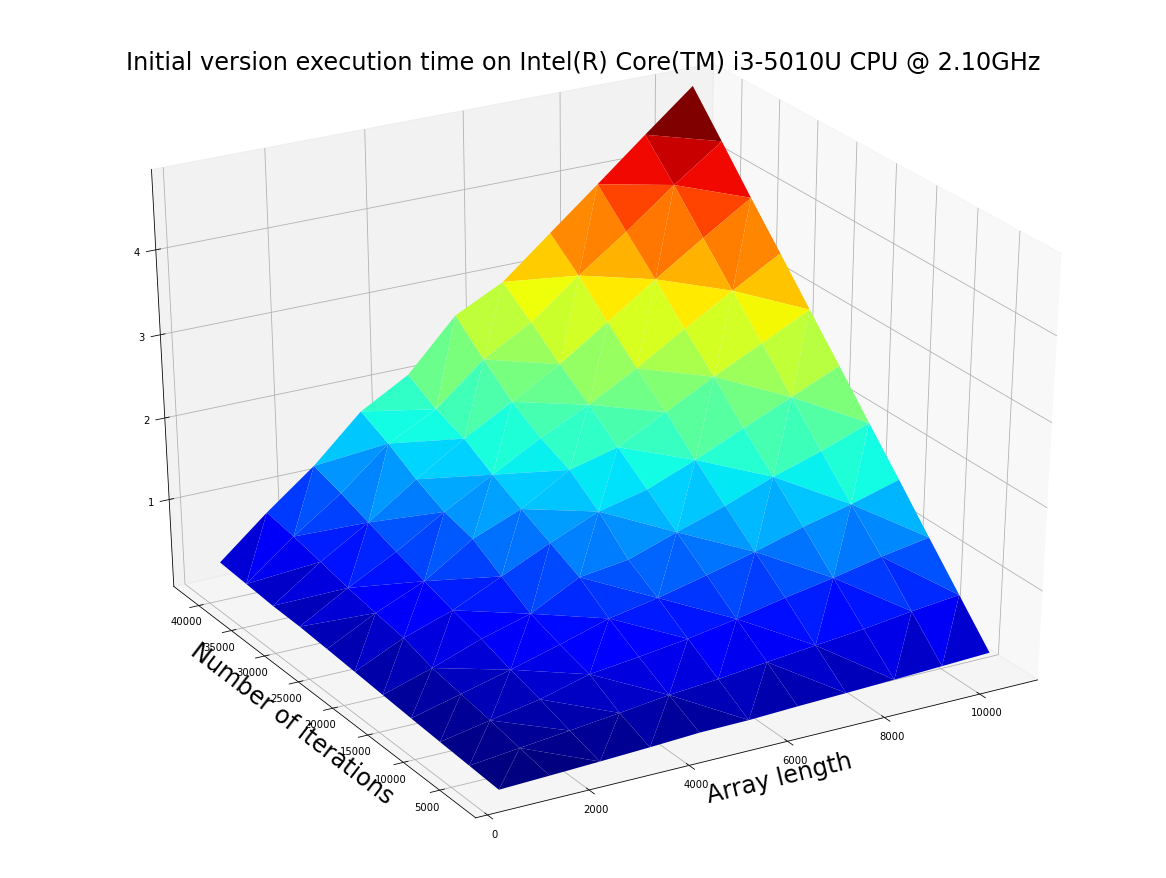

In [4]:
x, y, z = makeData("init_intel_i3.txt")

fig = pylab.figure(figsize=(16, 12))
axes = Axes3D(fig, azim=-120)

axes.plot_trisurf(x, y, z, cmap=plt.cm.jet)

pylab.xlim(0, 11000)
pylab.ylim(1000, 43000)
pylab.title("Initial version execution time on Intel(R) Core(TM) i3-5010U CPU @ 2.10GHz", fontsize=24, fontweight=50, color="Black")
pylab.xlabel("Array length", fontsize=24, color="Black")
pylab.ylabel("Number of iterations",fontsize=24, color="Black")
pylab.show()

Version #1 execution time on Intel(R) Core(TM) i3-5010U CPU @ 2.10GHz

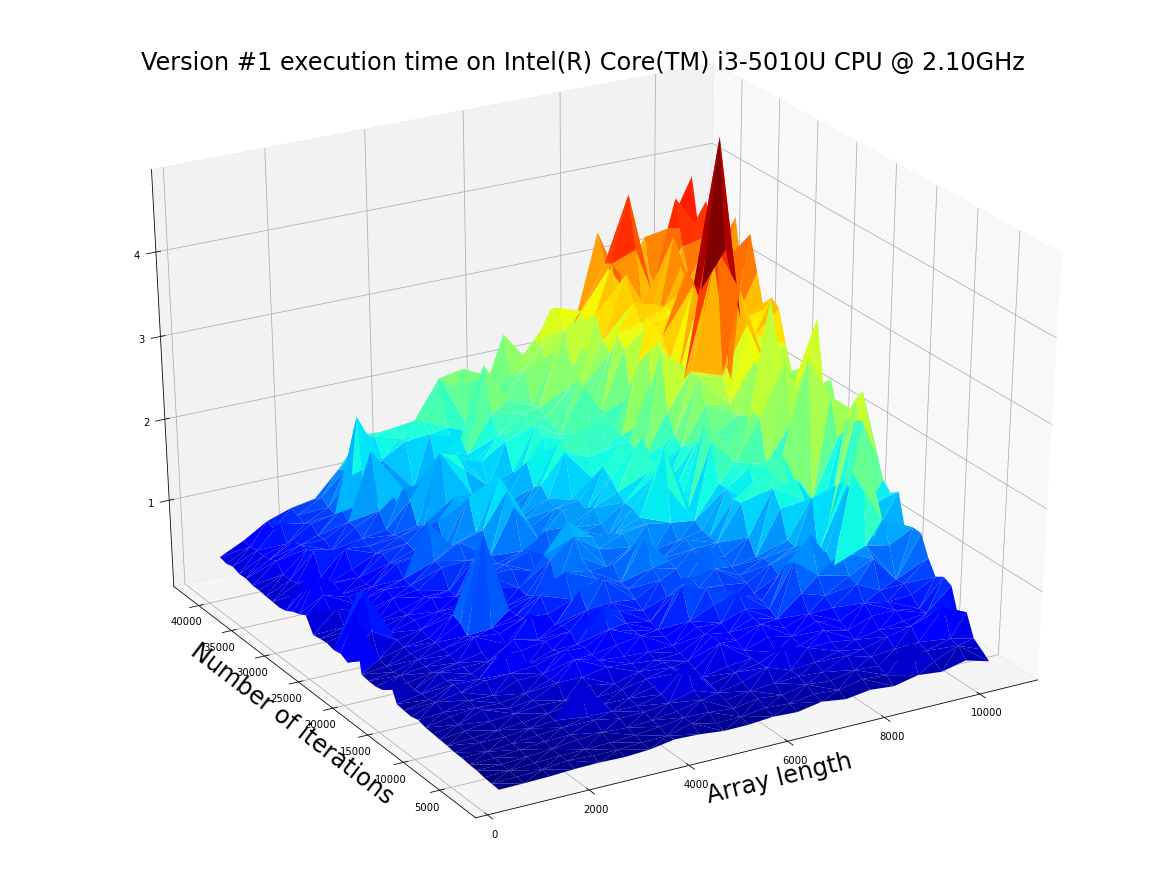

In [5]:
x, y, z = makeData("v1_intel_i3.txt")

fig = pylab.figure(figsize=(16, 12))
axes = Axes3D(fig, azim=-120)

axes.plot_trisurf(x, y, z, cmap=plt.cm.jet)

pylab.xlim(0, 11000)
pylab.ylim(1000, 43000)
pylab.title("Version #1 execution time on Intel(R) Core(TM) i3-5010U CPU @ 2.10GHz", fontsize=24, fontweight=50, color="Black")
pylab.xlabel("Array length", fontsize=24, color="Black")
pylab.ylabel("Number of iterations",fontsize=24, color="Black")
pylab.show()

Version #2 execution time on Intel(R) Core(TM) i3-5010U CPU @ 2.10GHz

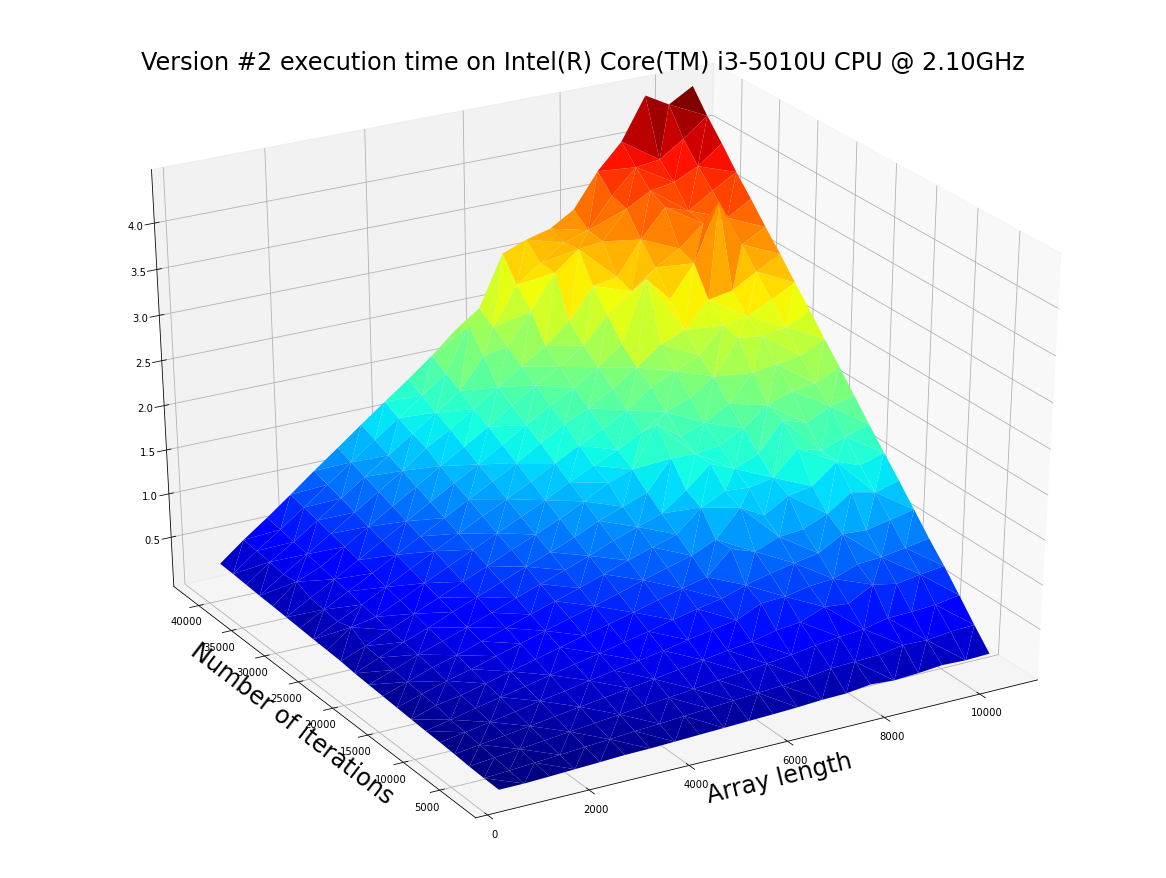

In [6]:
x, y, z = makeData("v2_intel_i3.txt")

fig = pylab.figure(figsize=(16, 12))
axes = Axes3D(fig, azim=-120)

axes.plot_trisurf(x, y, z, cmap=plt.cm.jet)

pylab.xlim(0, 11000)
pylab.ylim(1000, 43000)
pylab.title("Version #2 execution time on Intel(R) Core(TM) i3-5010U CPU @ 2.10GHz", fontsize=24, fontweight=50, color="Black")
pylab.xlabel("Array length", fontsize=24, color="Black")
pylab.ylabel("Number of iterations",fontsize=24, color="Black")
pylab.show()

Final version execution time on Intel(R) Core(TM) i3-5010U CPU @ 2.10GHz

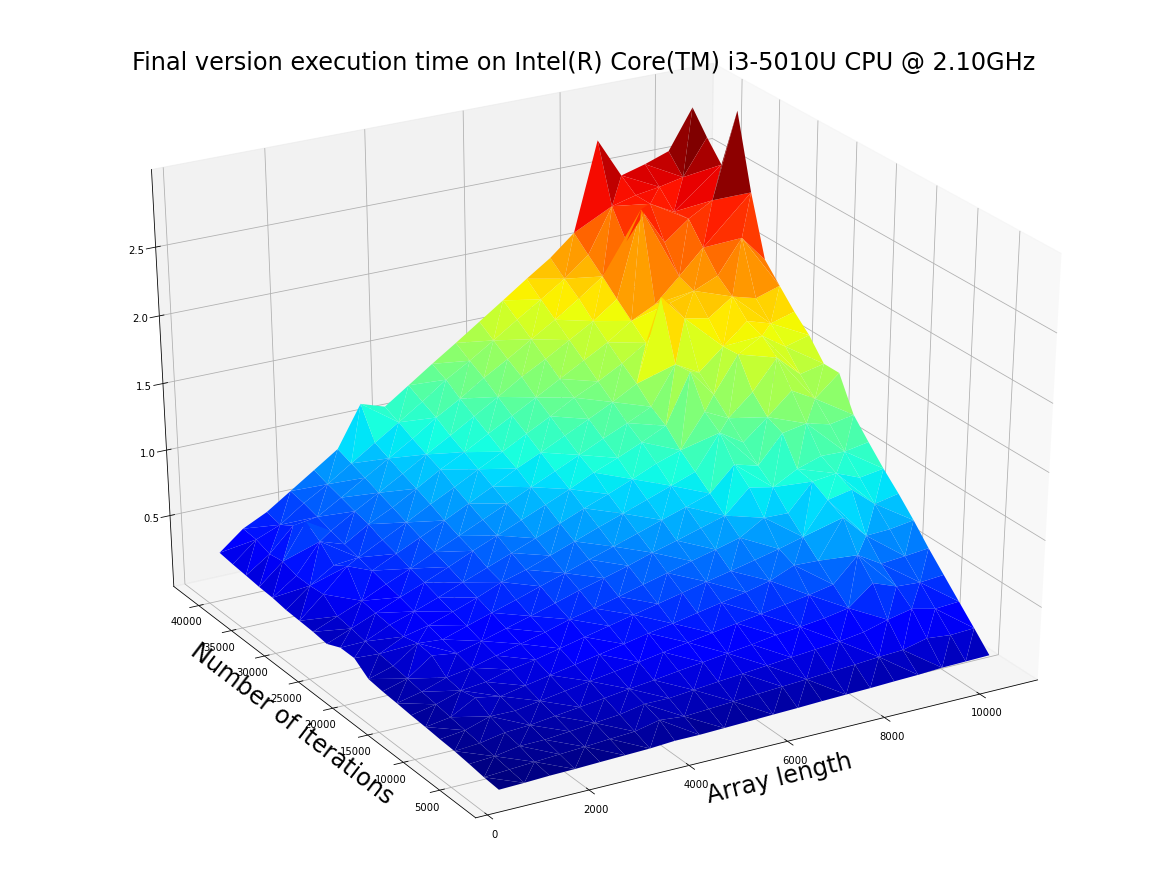

In [7]:
x, y, z = makeData("final_intel_i3.txt")

fig = pylab.figure(figsize=(16, 12))
axes = Axes3D(fig, azim=-120)

axes.plot_trisurf(x, y, z, cmap=plt.cm.jet)

pylab.xlim(0, 11000)
pylab.ylim(1000, 43000)
pylab.title("Final version execution time on Intel(R) Core(TM) i3-5010U CPU @ 2.10GHz", fontsize=24, fontweight=50, color="Black")
pylab.xlabel("Array length", fontsize=24, color="Black")
pylab.ylabel("Number of iterations",fontsize=24, color="Black")
pylab.show()

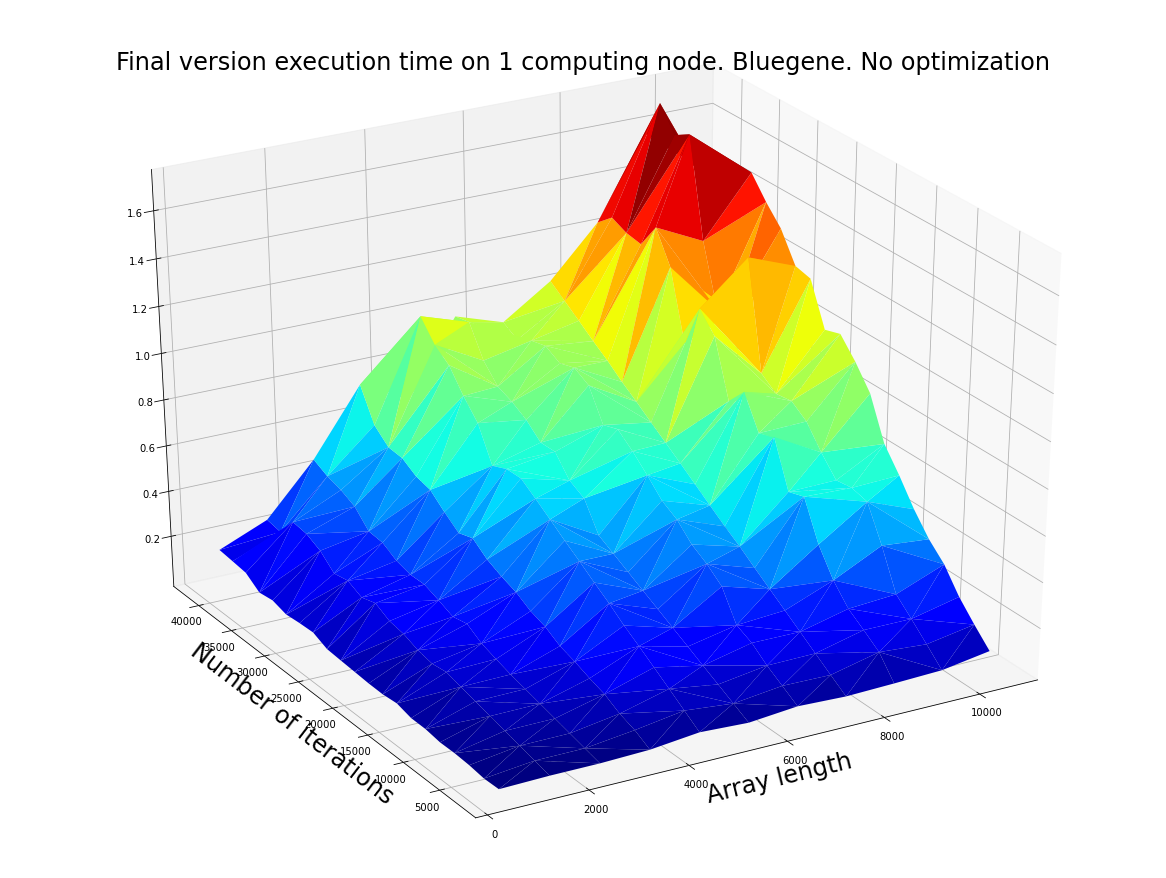

In [8]:
x, y, z = makeData("bluegene_1thr_no_opt.txt")
fig = pylab.figure(figsize=(16, 12))
axes = Axes3D(fig, azim = -120)

axes.plot_trisurf(x, y, z, cmap=plt.cm.jet)

pylab.xlim(0, 11000)
pylab.ylim(1000, 43000)
pylab.title("Final version execution time on 1 computing node. Bluegene. No optimization", fontsize = 24, fontweight = 50, color = "Black")
pylab.xlabel("Array length", fontsize = 24, color = "Black")
pylab.ylabel("Number of iterations",fontsize = 24, color = "Black")
pylab.show()

Final version execution time on 2 computing nodes. Bluegene. No optimization

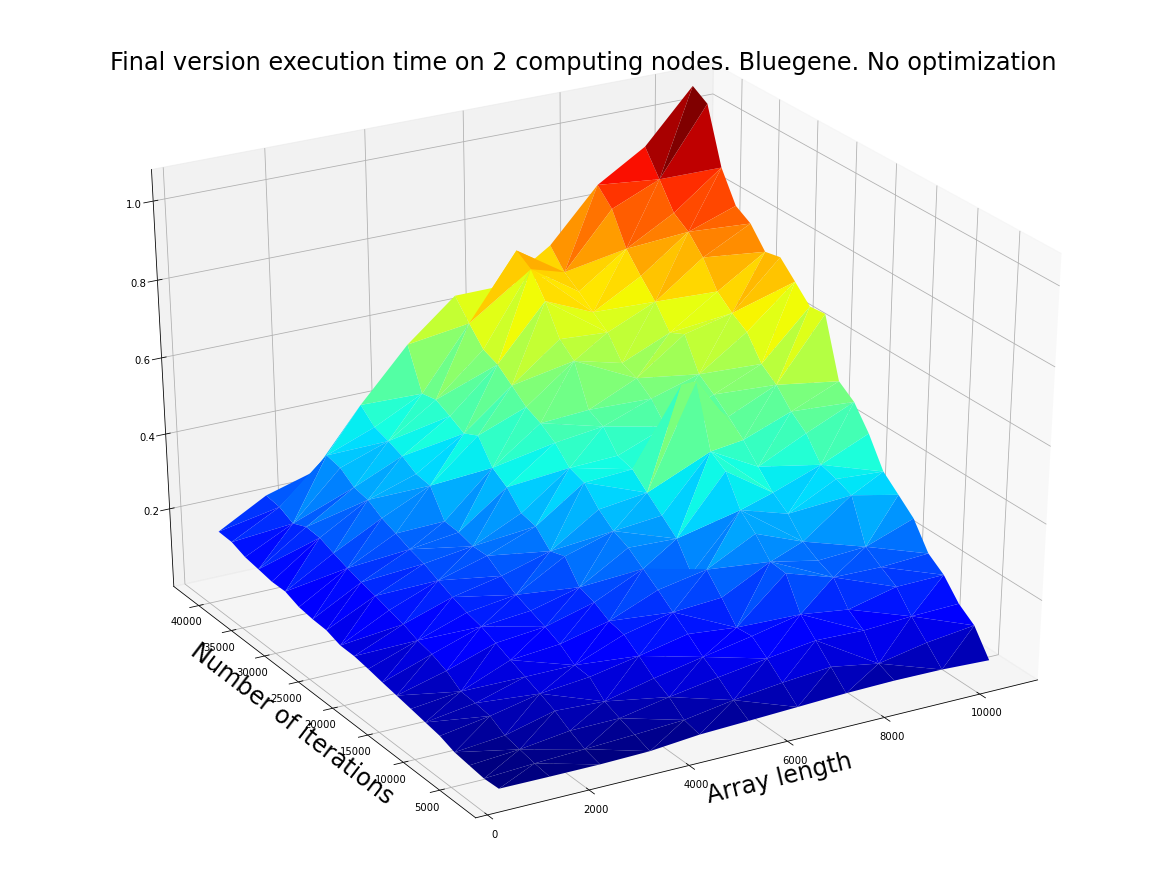

In [9]:
x, y, z = makeData("bluegene_2thr_no_opt.txt")
fig = pylab.figure(figsize=(16, 12))
axes = Axes3D(fig, azim = -120)

axes.plot_trisurf(x, y, z, cmap=plt.cm.jet)

pylab.xlim(0, 11000)
pylab.ylim(1000, 43000)
pylab.title("Final version execution time on 2 computing nodes. Bluegene. No optimization", fontsize = 24, fontweight = 50, color = "Black")
pylab.xlabel("Array length", fontsize = 24, color = "Black")
pylab.ylabel("Number of iterations",fontsize = 24, color = "Black")
pylab.show()

Execution time dependence on the array length. Different number of threads. Polus. Optimization O1

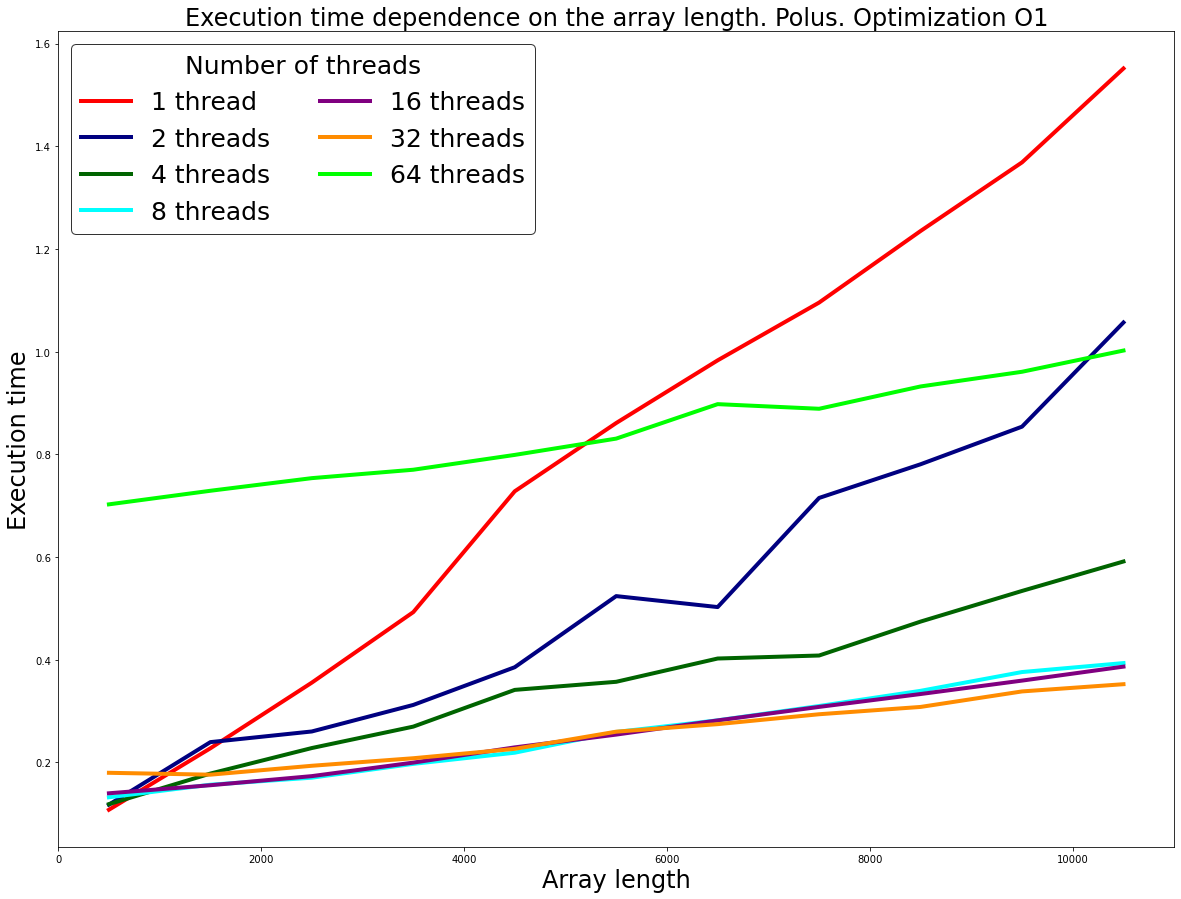

In [10]:
data = makeDataThreads3D("polus_O1.txt", t_filter=42000, 
                             threads=np.array([1, 2, 4, 8, 16, 32, 64]), 
                             lengths=np.array([231, 231, 231, 231, 231, 231, 231]))
temp = data.loc[data["N"] == 1500]

data1 = data.loc[data["THREADS"] == 1]
x1 = data1["N"]
y1 = data1["TIME"]

data2 = data.loc[data["THREADS"] == 2]
x2 = data2["N"]
y2 = data2["TIME"]

data3 = data.loc[data["THREADS"] == 4]
x3 = data3["N"]
y3 = data3["TIME"]

data4 = data.loc[data["THREADS"] == 8]
x4 = data4["N"]
y4 = data4["TIME"]

data5 = data.loc[data["THREADS"] == 16]
x5 = data5["N"]
y5 = data5["TIME"]

data6 = data.loc[data["THREADS"] == 32]
x6 = data6["N"]
y6 = data6["TIME"]

data7 = data.loc[data["THREADS"] == 64]
x7 = data7["N"]
y7 = data7["TIME"]


fig = pylab.figure(figsize=(20, 15))

pylab.plot(x1, y1, c="red", linewidth=4., label="1 thread")
pylab.plot(x2, y2, c="navy", linewidth=4., label="2 threads")
pylab.plot(x3, y3, c="darkgreen", linewidth=4., label="4 threads")
pylab.plot(x4, y4, c="aqua", linewidth=4., label="8 threads")
pylab.plot(x5, y5, c="purple", linewidth=4., label="16 threads")
pylab.plot(x6, y6, c="darkorange", linewidth=4., label="32 threads")
pylab.plot(x7, y7, c="lime", linewidth=4., label="64 threads")

pylab.title("Execution time dependence on the array length. Polus. Optimization O1",
            fontsize=24, fontweight=50, color="Black")
pylab.ylabel("Execution time", fontsize=24, color="Black")
pylab.xlabel("Array length",fontsize=24, color="Black")
pylab.legend(fontsize=25,
      ncol=2,  #area color
      edgecolor="black",    #color of an edge
      title="Number of threads",    #header
      title_fontsize="25")    #header font size
pylab.show()

Execution time dependence on the array length. Different number of threads. Polus. Optimization O2

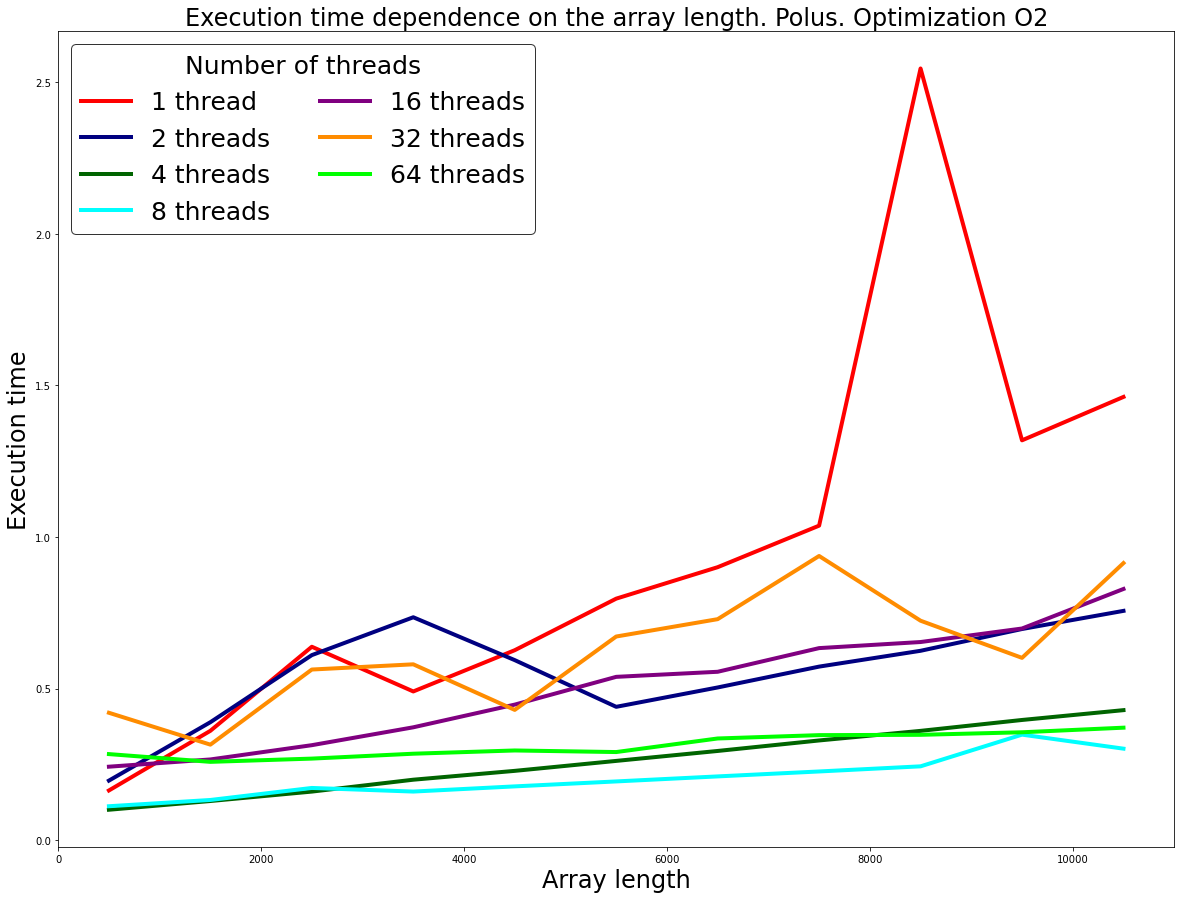

In [11]:
data = makeDataThreads3D("polus_O2.txt", t_filter=42000, 
                             threads=np.array([1, 2, 4, 8, 16, 32, 64]), 
                             lengths=np.array([231, 231, 231, 231, 231, 231, 231]))
temp = data.loc[data["N"] == 1500]

data1 = data.loc[data["THREADS"] == 1]
x1 = data1["N"]
y1 = data1["TIME"]

data2 = data.loc[data["THREADS"] == 2]
x2 = data2["N"]
y2 = data2["TIME"]

data3 = data.loc[data["THREADS"] == 4]
x3 = data3["N"]
y3 = data3["TIME"]

data4 = data.loc[data["THREADS"] == 8]
x4 = data4["N"]
y4 = data4["TIME"]

data5 = data.loc[data["THREADS"] == 16]
x5 = data5["N"]
y5 = data5["TIME"]

data6 = data.loc[data["THREADS"] == 32]
x6 = data6["N"]
y6 = data6["TIME"]

data7 = data.loc[data["THREADS"] == 64]
x7 = data7["N"]
y7 = data7["TIME"]


fig = pylab.figure(figsize=(20, 15))

pylab.plot(x1, y1, c="red", linewidth=4., label="1 thread")
pylab.plot(x2, y2, c="navy", linewidth=4., label="2 threads")
pylab.plot(x3, y3, c="darkgreen", linewidth=4., label="4 threads")
pylab.plot(x4, y4, c="aqua", linewidth=4., label="8 threads")
pylab.plot(x5, y5, c="purple", linewidth=4., label="16 threads")
pylab.plot(x6, y6, c="darkorange", linewidth=4., label="32 threads")
pylab.plot(x7, y7, c="lime", linewidth=4., label="64 threads")

pylab.title("Execution time dependence on the array length. Polus. Optimization O2",
            fontsize=24, fontweight=50, color="Black")
pylab.ylabel("Execution time", fontsize=24, color="Black")
pylab.xlabel("Array length",fontsize=24, color="Black")
pylab.legend(fontsize=25,
      ncol=2,  #area color
      edgecolor="black",    #color of an edge
      title="Number of threads",    #header
      title_fontsize="25")    #header font size
pylab.show()

Execution time dependence on the array length. Different number of threads. Polus. Optimization O3

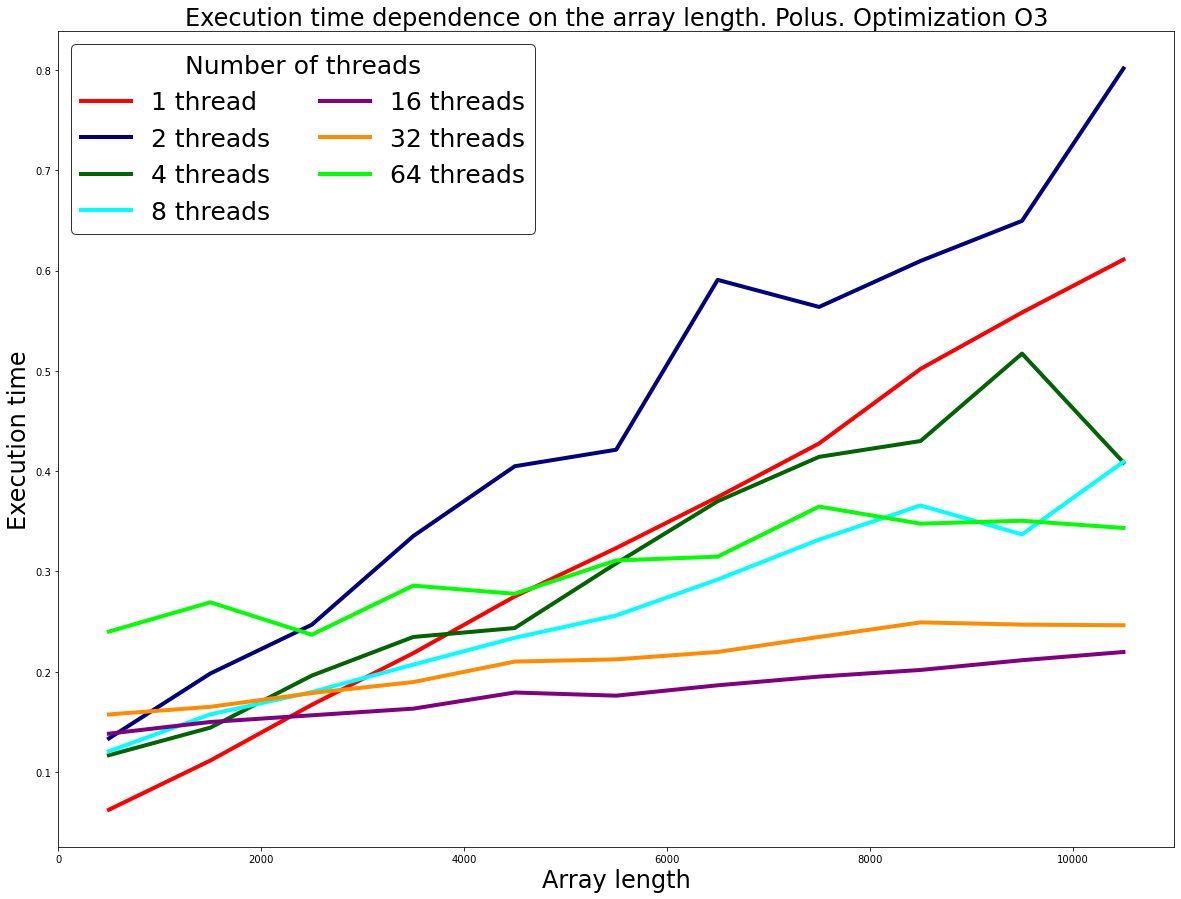

In [12]:
data = makeDataThreads3D("polus_O3.txt", t_filter=42000, 
                             threads=np.array([1, 2, 4, 8, 16, 32, 64]), 
                             lengths=np.array([231, 231, 231, 231, 231, 231, 231]))
temp = data.loc[data["N"] == 1500]

data1 = data.loc[data["THREADS"] == 1]
x1 = data1["N"]
y1 = data1["TIME"]

data2 = data.loc[data["THREADS"] == 2]
x2 = data2["N"]
y2 = data2["TIME"]

data3 = data.loc[data["THREADS"] == 4]
x3 = data3["N"]
y3 = data3["TIME"]

data4 = data.loc[data["THREADS"] == 8]
x4 = data4["N"]
y4 = data4["TIME"]

data5 = data.loc[data["THREADS"] == 16]
x5 = data5["N"]
y5 = data5["TIME"]

data6 = data.loc[data["THREADS"] == 32]
x6 = data6["N"]
y6 = data6["TIME"]

data7 = data.loc[data["THREADS"] == 64]
x7 = data7["N"]
y7 = data7["TIME"]


fig = pylab.figure(figsize=(20, 15))

pylab.plot(x1, y1, c="red", linewidth=4., label="1 thread")
pylab.plot(x2, y2, c="navy", linewidth=4., label="2 threads")
pylab.plot(x3, y3, c="darkgreen", linewidth=4., label="4 threads")
pylab.plot(x4, y4, c="aqua", linewidth=4., label="8 threads")
pylab.plot(x5, y5, c="purple", linewidth=4., label="16 threads")
pylab.plot(x6, y6, c="darkorange", linewidth=4., label="32 threads")
pylab.plot(x7, y7, c="lime", linewidth=4., label="64 threads")

pylab.title("Execution time dependence on the array length. Polus. Optimization O3",
            fontsize=24, fontweight=50, color="Black")
pylab.ylabel("Execution time", fontsize=24, color="Black")
pylab.xlabel("Array length",fontsize=24, color="Black")
pylab.legend(fontsize=25,
      ncol=2,  #area color
      edgecolor="black",    #color of an edge
      title="Number of threads",    #header
      title_fontsize="25")    #header font size
pylab.show()

Execution time dependence on the array length. Polus. Optimization O4

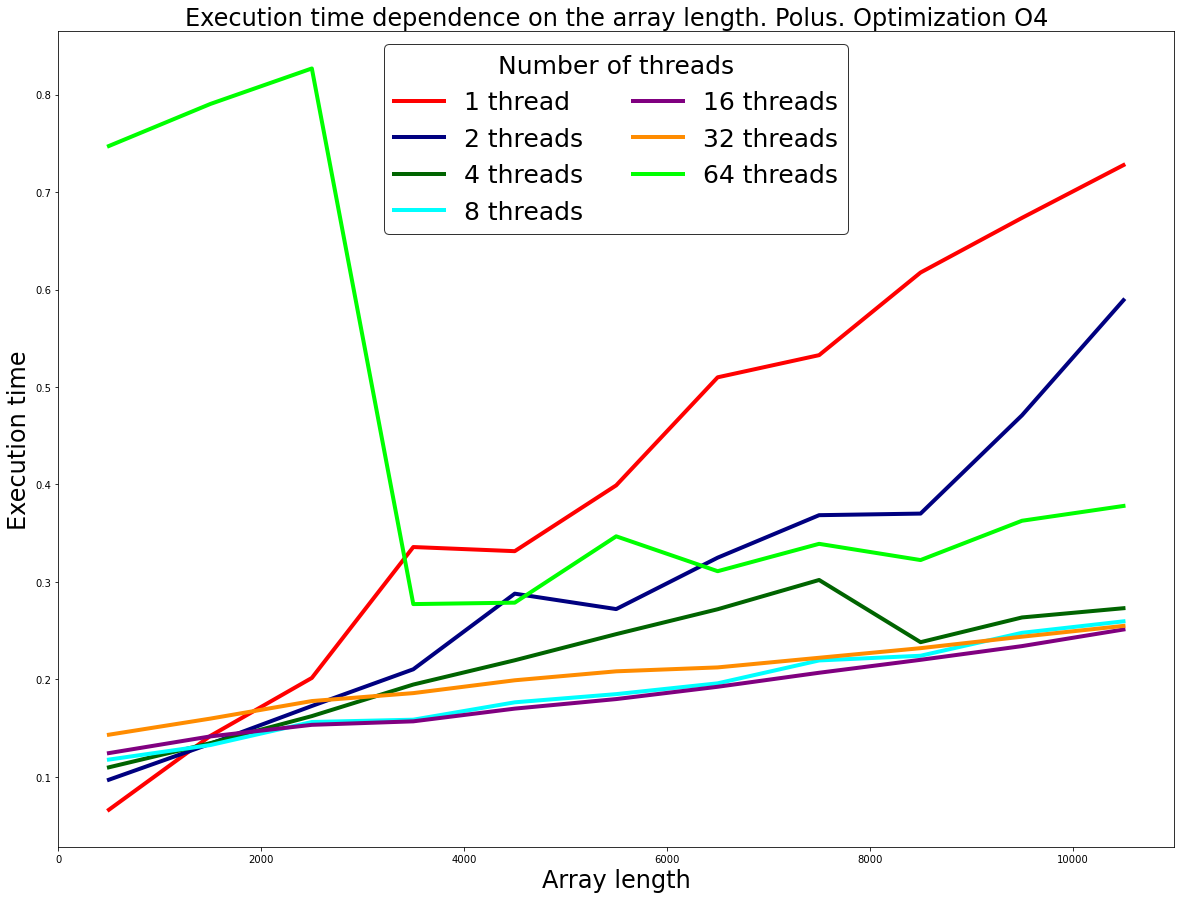

In [13]:
data = makeDataThreads3D("polus_O4.txt", t_filter=42000, 
                             threads=np.array([1, 2, 4, 8, 16, 32, 64]), 
                             lengths=np.array([231, 231, 231, 231, 231, 231, 231]))
temp = data.loc[data["N"] == 1500]

data1 = data.loc[data["THREADS"] == 1]
x1 = data1["N"]
y1 = data1["TIME"]

data2 = data.loc[data["THREADS"] == 2]
x2 = data2["N"]
y2 = data2["TIME"]

data3 = data.loc[data["THREADS"] == 4]
x3 = data3["N"]
y3 = data3["TIME"]

data4 = data.loc[data["THREADS"] == 8]
x4 = data4["N"]
y4 = data4["TIME"]

data5 = data.loc[data["THREADS"] == 16]
x5 = data5["N"]
y5 = data5["TIME"]

data6 = data.loc[data["THREADS"] == 32]
x6 = data6["N"]
y6 = data6["TIME"]

data7 = data.loc[data["THREADS"] == 64]
x7 = data7["N"]
y7 = data7["TIME"]


fig = pylab.figure(figsize=(20, 15))

pylab.plot(x1, y1, c="red", linewidth=4., label="1 thread")
pylab.plot(x2, y2, c="navy", linewidth=4., label="2 threads")
pylab.plot(x3, y3, c="darkgreen", linewidth=4., label="4 threads")
pylab.plot(x4, y4, c="aqua", linewidth=4., label="8 threads")
pylab.plot(x5, y5, c="purple", linewidth=4., label="16 threads")
pylab.plot(x6, y6, c="darkorange", linewidth=4., label="32 threads")
pylab.plot(x7, y7, c="lime", linewidth=4., label="64 threads")

pylab.title("Execution time dependence on the array length. Polus. Optimization O4",
            fontsize=24, fontweight=50, color="Black")
pylab.ylabel("Execution time", fontsize=24, color="Black")
pylab.xlabel("Array length",fontsize=24, color="Black")
pylab.legend(fontsize=25,
      ncol=2,  #area color
      edgecolor="black",    #color of an edge
      title="Number of threads",    #header
      title_fontsize="25")    #header font size
pylab.show()

Execution time of final algorithm with optimal parameters (threads and optimization type). Polus

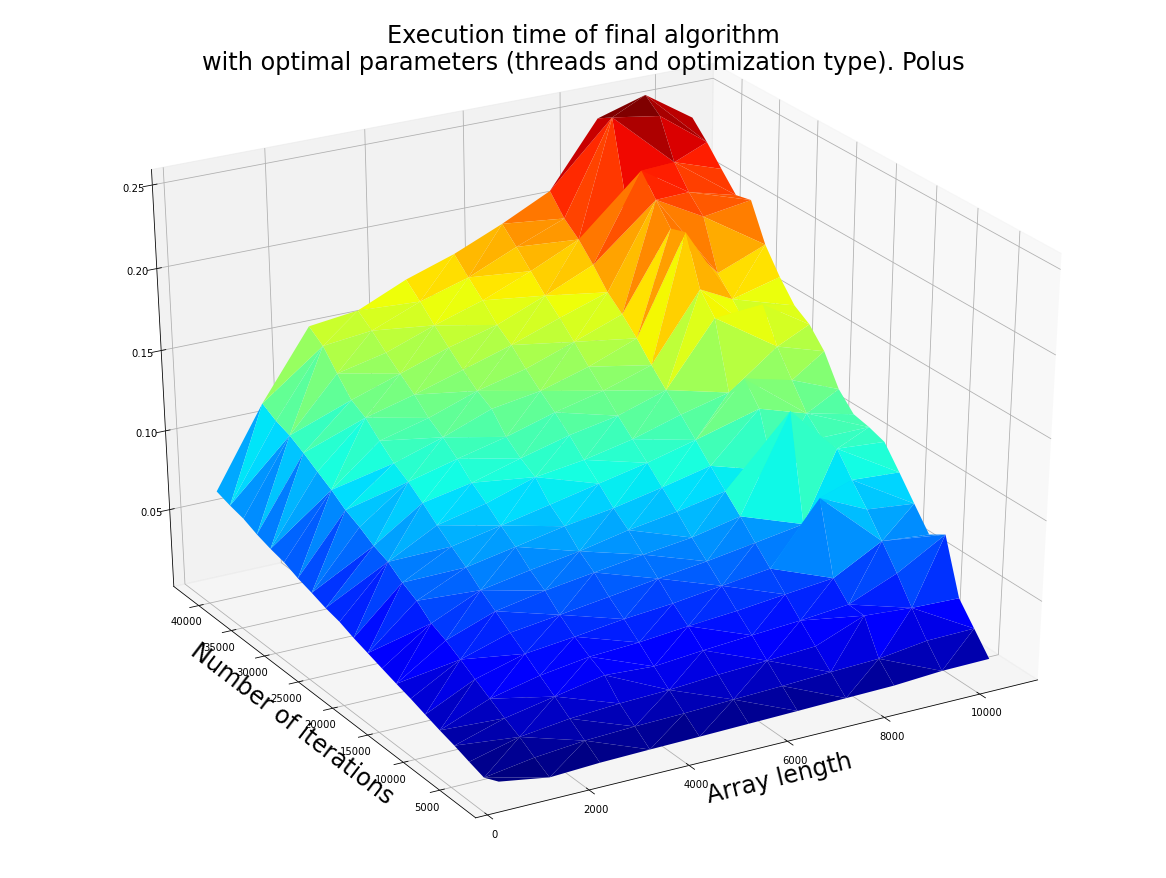

In [14]:
x, y, z = makeData("polus_perfect.txt")
fig = pylab.figure(figsize=(16, 12))
axes = Axes3D(fig, azim = -120)

axes.plot_trisurf(x, y, z, cmap=plt.cm.jet)

pylab.xlim(0, 11000)
pylab.ylim(1000, 43000)
pylab.title("Execution time of final algorithm\nwith optimal parameters (threads and optimization type). Polus", fontsize = 24, fontweight = 50, color = "Black")
pylab.xlabel("Array length", fontsize = 24, color = "Black")
pylab.ylabel("Number of iterations",fontsize = 24, color = "Black")
pylab.show()

Total speedup. Polus

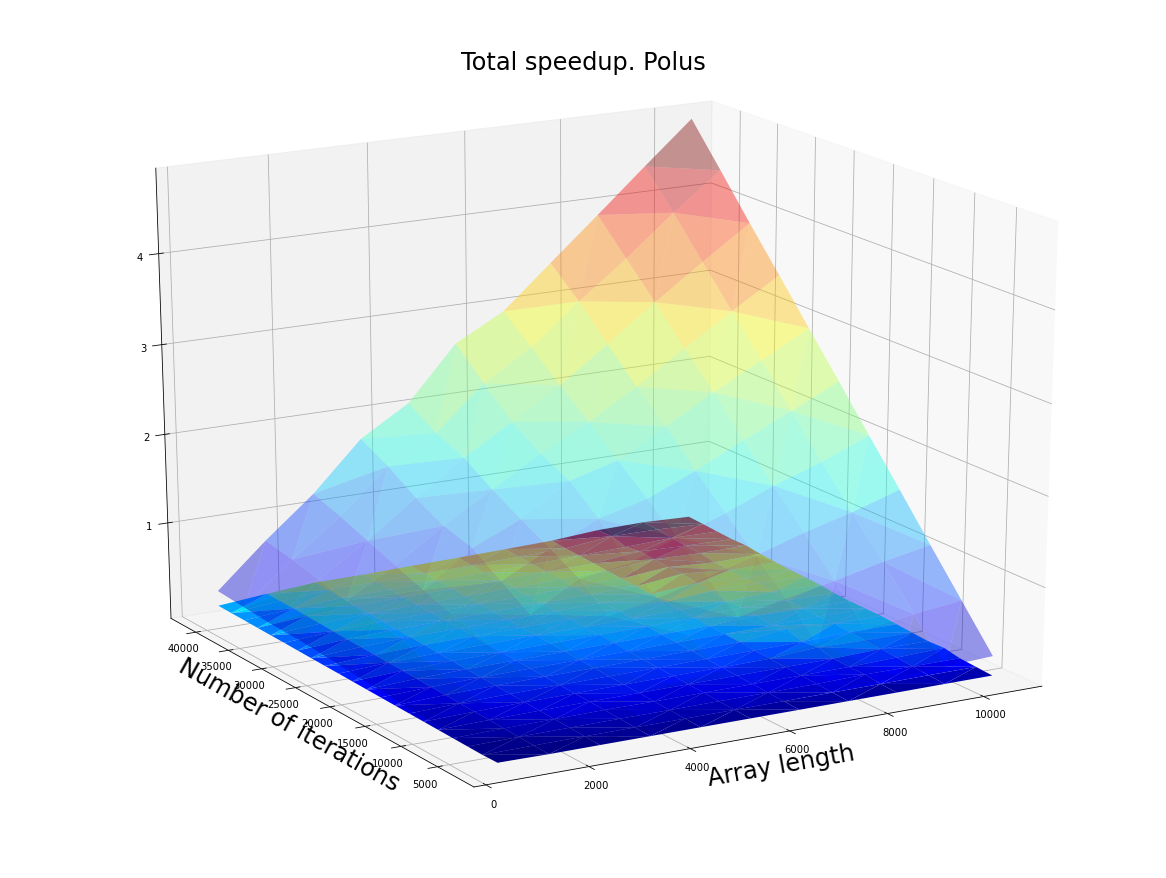

In [15]:
x1, y1, z1 = makeData("polus_perfect.txt")
fig1 = pylab.figure(figsize=(16, 12))
axes1 = Axes3D(fig1, azim = -120, elev = 20)
axes1.plot_trisurf(x1, y1, z1, cmap=plt.cm.jet)

x2, y2, z2 = makeData("init_intel_i3.txt")
axes1.plot_trisurf(x2, y2, z2, cmap=plt.cm.jet, alpha = 0.4)

pylab.xlim(0, 11000)
pylab.ylim(1000, 43000)
pylab.title("Total speedup. Polus", fontsize = 24, fontweight = 50, color = "Black")
pylab.xlabel("Array length", fontsize = 24, color = "Black")
pylab.ylabel("Number of iterations",fontsize = 24, color = "Black")
pylab.show()